In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
#css = open('style-table.css').read() + open('style-notebook.css').read()
css = open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.read_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,Orlando Vargas,2005
1,Niu-Peng,1989
2,Anandabhadram,2005
3,Mahendra Varma,1993
4,Beomdiga shidae,1970


In [4]:
cast = pd.read_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27.0
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3.0
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


In [5]:
# build decade column for each Df
titles['decade'] = titles.year //10 * 10
cast['decade'] = cast.year //10 * 10

### Using groupby(), plot the number of films that have been released each decade in the history of cinema.

In [6]:
dc = titles.groupby('decade').size()
dc

decade
1890        6
1900       36
1910     6346
1920     8657
1930     9964
1940     8308
1950    12110
1960    16508
1970    17793
1980    19293
1990    21294
2000    37706
2010    56531
2020       39
dtype: int64

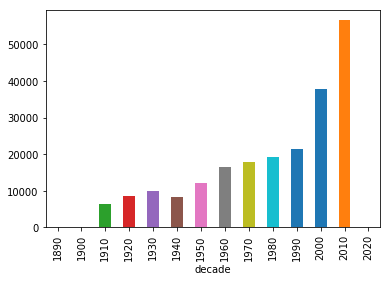

In [7]:
dc.plot(kind='bar')

### Use groupby() to plot the number of "Hamlet" films made each decade.

In [36]:
hml = titles[titles.title == 'Hamlet']

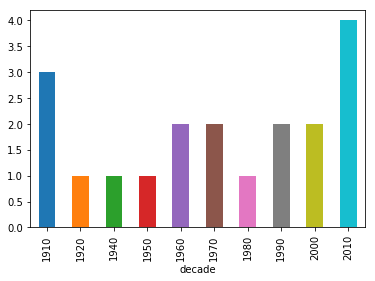

In [38]:
hml.groupby('decade').size().plot(kind='bar')

### How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

In [8]:
fs = cast[cast.decade == 1950]
fs.head()

,title,year,name,type,character,n,decade
58,Fire Down Below,1957,'Stretch' Cox Troupe,actor,Limbo Dance by,20.0,1950
60,Dorp aan de rivier,1958,Frans 't Hoen,actor,Dirk Jan,15.0,1950
105,Die Todesarena,1953,Die 3 Motorellos,actor,Themselves,NaN,1950
227,Palletoori Pilla,1950,Subba Rao A.V.,actor,Kampanna Dora,4.0,1950
228,Sri Kalahastiswara Mahatyam,1954,Subba Rao A.V.,actor,Basavareddy,12.0,1950


In [9]:
group =  fs.groupby(['n', 'type'])

In [30]:
group.size()[0:2]

n    type   
1.0  actor      6375
     actress    2813
dtype: int64

In [33]:
print(group.get_group((1, 'actor')).title.count())
print(group.get_group((1, 'actress')).title.count())

6375
2813


### In the 1950s decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5?

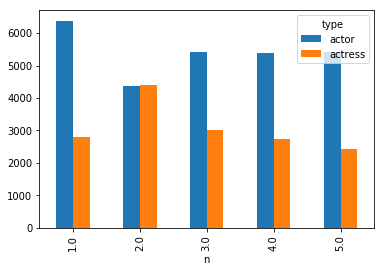

In [18]:
fs.groupby(['n', 'type']).size()[0:10].unstack().plot(kind='bar')

### Use groupby() to determine how many roles are listed for each of the Pink Panther movies.

In [24]:
pp = cast[cast.title.str.contains('Pink Panther')]
pp.head()

,title,year,name,type,character,n,decade
842,The Pink Panther,2006,William Abadie,actor,Bizu,11.0,2000
1760,Revenge of the Pink Panther,1978,Fredric Abbott,actor,Douvier's Soldier,38.0,1970
4177,Curse of the Pink Panther,1983,William Abney,actor,Hugo the Houseman,33.0,1980
11369,Son of the Pink Panther,1993,Tony Adams,actor,Wedding Guest,NaN,1990
11370,The Return of the Pink Panther,1975,Tony Adams,actor,Waiter,NaN,1970


In [25]:
pp.groupby('title').character.count()

title
Curse of the Pink Panther          67
Revenge of the Pink Panther        64
Son of the Pink Panther            46
The Pink Panther                  108
The Pink Panther 2                 82
The Pink Panther Strikes Again     73
The Return of the Pink Panther     30
Trail of the Pink Panther          40
Name: character, dtype: int64

### List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [26]:
fo = cast[cast.name == 'Frank Oz']
fo.head()

,title,year,name,type,character,n,decade
1529414,An American Werewolf in London,1981,Frank Oz,actor,Mr. Collins,13.0,1980
1529415,An American Werewolf in London,1981,Frank Oz,actor,Miss Piggy,13.0,1980
1529416,Blues Brothers 2000,1998,Frank Oz,actor,Warden,4.0,1990
1529417,Innocent Blood,1992,Frank Oz,actor,Pathologist,21.0,1990
1529418,Inside Out,2015,Frank Oz,actor,Subconscious Guard Dave,14.0,2010


In [56]:
cs = fo.groupby(['year','title']).character.count()

In [53]:
cs[cs.values > 1]

year  title                                   
1979  The Muppet Movie                            8
1981  An American Werewolf in London              2
      The Great Muppet Caper                      6
1982  The Dark Crystal                            2
1984  The Muppets Take Manhattan                  7
1985  Sesame Street Presents: Follow that Bird    3
1992  The Muppet Christmas Carol                  7
1996  Muppet Treasure Island                      4
1999  Muppets from Space                          4
      The Adventures of Elmo in Grouchland        3
Name: character, dtype: int64

### List each of the characters that Frank Oz has portrayed at least twice.

In [64]:
mult = fo.groupby('character').size()
mult[mult > 1].sort_values(ascending=False)

character
Miss Piggy        6
Animal            6
Yoda              5
Sam the Eagle     5
Fozzie Bear       4
Cookie Monster    3
Bert              3
Grover            2
dtype: int64